<a href="https://colab.research.google.com/github/NotBizzaark/PyTorch/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 Features of flowers) --> Hidden layer H1 --> H2(n) --> output
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
    # question: if i have multiple layers should i do this for multiple layers??

  def forward(self, x):
    x = F.relu(self.fc1(x)) # what is relu function?
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [4]:
# pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'] = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df

<ipython-input-7-58e866dd4138>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Train test split
X = df.drop('species', axis=1)
y = df['species']

In [9]:
# Convert into numpy arrays
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [12]:
# Convert labels to Tensor Float
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
criterion =nn.CrossEntropyLoss()
# Choose Optimizer (Adam Optimizer)
# lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # why tweaking learning rate is important


In [14]:
# Train our model
# Epochs (one run thru all the training data in our network (kind of iterations))
epochs= 100
losses = []
for i in range(epochs):
  # GO forward
  y_pred = model.forward(X_train) # get predicted result
  # Measure Loss/error
  loss = criterion(y_pred, y_train) # predicted values vs y_train values
  losses.append(loss.detach().numpy())
  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation
  # take error and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.0634487867355347
Epoch: 10 and loss: 0.853392481803894
Epoch: 20 and loss: 0.7418939471244812
Epoch: 30 and loss: 0.6669458746910095
Epoch: 40 and loss: 0.5844423770904541
Epoch: 50 and loss: 0.434172660112381
Epoch: 60 and loss: 0.23810161650180817
Epoch: 70 and loss: 0.12942932546138763
Epoch: 80 and loss: 0.0891878753900528
Epoch: 90 and loss: 0.07377155125141144


Text(0.5, 0, 'Epochs')

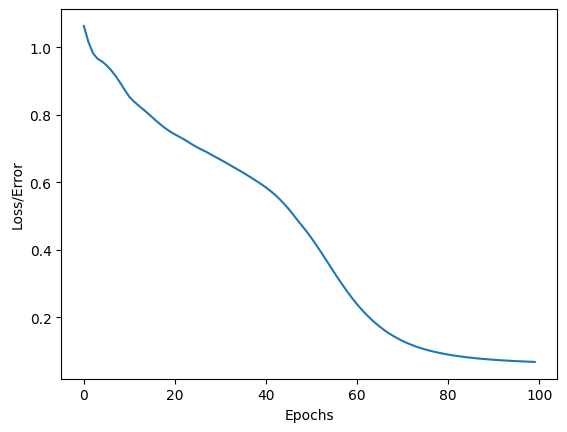

In [15]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')
# if its not flattening we tweak our model, change the learning rate maybe.

In [17]:
# Evaluate Model
with torch.no_grad(): # turns of propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
  print(loss)


tensor(0.0501)


In [21]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct out of {len(y_test)}')

1.)  tensor([-4.9385,  5.0202,  1.6900]) 	 1
2.)  tensor([ 4.8333, -3.7144, -3.0497]) 	 0
3.)  tensor([ 3.9183, -2.6988, -2.7390]) 	 0
4.)  tensor([-5.1294,  5.4724,  1.4117]) 	 1
5.)  tensor([-7.7843,  3.8784,  6.7125]) 	 2
6.)  tensor([-8.5525,  5.3589,  6.0493]) 	 2
7.)  tensor([ 3.3890, -2.0993, -2.5921]) 	 0
8.)  tensor([ 4.1467, -2.9319, -2.8163]) 	 0
9.)  tensor([-4.5701,  5.4070,  0.7236]) 	 1
10.)  tensor([ 4.5266, -3.3728, -2.9471]) 	 0
11.)  tensor([-5.6781,  5.9239,  1.7233]) 	 1
12.)  tensor([-8.3306,  3.2379,  8.0212]) 	 2
13.)  tensor([-3.6558,  4.9917,  0.0867]) 	 1
14.)  tensor([-3.2232,  5.0204, -0.5175]) 	 1
15.)  tensor([-7.7104,  3.9404,  6.4839]) 	 2
16.)  tensor([-8.3115,  2.5412,  8.8039]) 	 2
17.)  tensor([-5.0962,  4.6560,  2.2574]) 	 1
18.)  tensor([-7.1529,  4.1279,  5.5760]) 	 2
19.)  tensor([-3.5763,  5.2312, -0.2718]) 	 1
20.)  tensor([ 4.8870, -3.7157, -3.1419]) 	 0
21.)  tensor([ 4.1754, -2.9627, -2.8451]) 	 0
22.)  tensor([-9.5563,  4.1232,  8.7804]) 	

In [22]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [23]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.3901, -3.2493, -2.8363])


In [24]:
new_iris2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [25]:
with torch.no_grad():
  print(model(new_iris2))

tensor([-7.0664,  3.7066,  5.8783])


In [26]:
# Save Model!!!
torch.save(model.state_dict(), 'simple_nn_model.pt',)

In [27]:
# Load Model!!!
new_model = Model()
new_model.load_state_dict(torch.load('simple_nn_model.pt'))

<All keys matched successfully>

In [28]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)